###### Import the neccessary libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Read the training and testing dataset



In [229]:
train = pd.read_csv('train.csv')

train.set_index(['loan_id'], inplace = True)
train.shape
# train.head(5)


(116058, 28)

In [230]:
test = pd.read_csv('test.csv')
# test.set_index(['loan_id'], inplace = True)
test.head(5)
test.shape

(35866, 28)

###### EDA

In [231]:
#### missng value present in the dataset in each column

train.isnull().sum()
test.isnull().sum()
### there is no NA present in the dataset

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [232]:
#### Different datatype
train.dtypes

source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                         

###### Cleaning the data

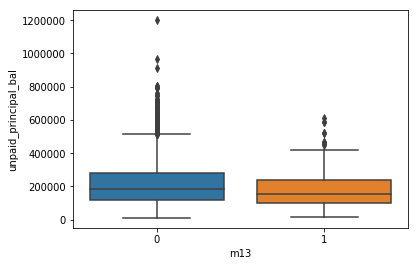

In [233]:
#plot the boxplot between m13 and unpaid_principal_bal.

sns.boxplot(x='m13',y='unpaid_principal_bal',data = train)

In [236]:
#### dataset describe

train.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [237]:
### Descriptive Statics that summarize the central tendency

train.groupby('m13').mean()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
m13,,,,,,,,,,,,,,,,,,,,,
0,3.867103,208371.965483,292.124404,67.410944,1.594644,30.714820,770.221985,2.782849,460.820823,0.003232,...,0.001326,0.001170,0.001941,0.001551,0.001845,0.001975,0.001845,0.002565,0.002149,0.001897
1,4.206182,181776.729560,320.699686,71.242138,1.328616,35.727987,716.352201,3.410377,240.154088,0.007862,...,0.119497,0.185535,0.292453,0.342767,0.424528,0.522013,0.643082,0.742138,0.907233,1.127358


From the statistical overview we can say that whoever has more interest_rate,loan term, loan_to_value, debt_to_income_ratio and insurance_percent also less less number_of_borrowers, borrower_credit_score than the resective mean value has maximu chances of deliquency.


###### Correlation Matrix



A correlation matrix is a table showing correlation coefficients between sets of variables
with the help of correlation matrix we can fin the relation between the varables.

In [238]:
train.corr()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
interest_rate,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,0.055883,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,0.015985,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,0.028731,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,0.075813,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,-0.015769,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,0.016558,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,-0.004608,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,0.145292,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,-0.016058,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651
insurance_type,0.055883,0.015985,0.028731,0.075813,-0.015769,0.016558,-0.004608,0.145292,-0.016058,1.000000,...,0.000428,0.003046,0.002948,-0.002356,0.001572,-0.001210,0.002546,-0.000638,-0.000890,0.005999


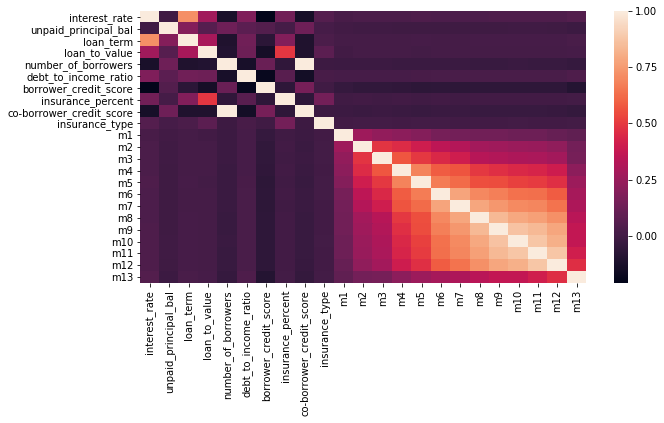

In [93]:
## heatmap

plt.subplots(figsize=(10,5))
sns.heatmap(train.corr())

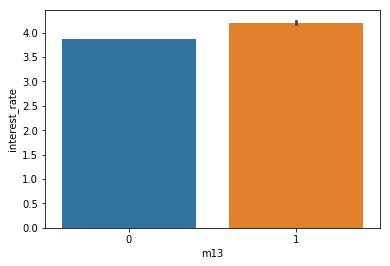

In [239]:
### there are many positively correlated variabes just look at some of them using bar plot

### interest_rates and m13

sns.barplot(x = 'm13', y='interest_rate',data=train)



Text(0.5, 0, 'Interest rate')

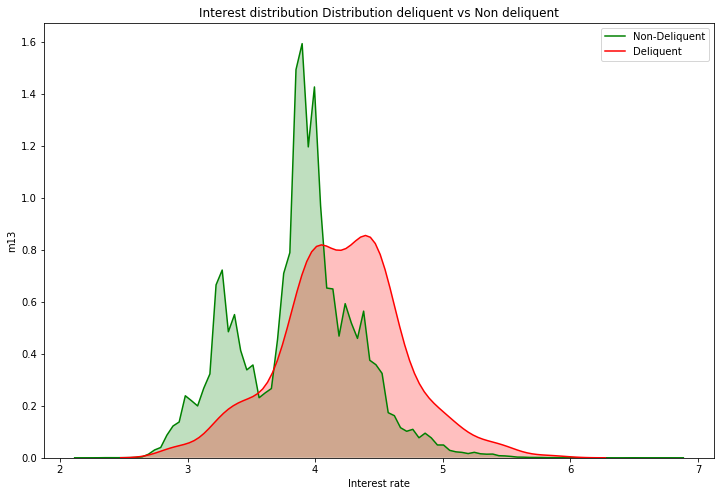

In [240]:
### using Kdeplot
plt.subplots(figsize=(12,8))
sns.kdeplot(train.loc[(train['m13']==0), 'interest_rate'], color='g',shade=True,Label='Non-Deliquent')
sns.kdeplot(train.loc[(train['m13']==1), 'interest_rate'], color='r',shade=True,Label='Deliquent')
plt.title('Interest distribution Distribution deliquent vs Non deliquent',fontsize=12)
plt.ylabel('m13',fontsize=10)
plt.xlabel('Interest rate',fontsize=10)

In [241]:
### Creatng some dummy variable to remove categorical effect
train = pd.get_dummies(train,columns=['financial_institution'],drop_first = True)
train = pd.get_dummies(train,columns=['source'],drop_first = True)
train = pd.get_dummies(train,columns=['loan_purpose'],drop_first = True)
train = pd.get_dummies(train,columns=['origination_date'],drop_first = True)
train = pd.get_dummies(train,columns=['first_payment_date'],drop_first = True)
train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Turner, Baldwin and Rhodes",source_Y,source_Z,loan_purpose_B12,loan_purpose_C86,origination_date_2012-02-01,origination_date_2012-03-01,first_payment_date_03/2012,first_payment_date_04/2012,first_payment_date_05/2012
loan_id,,,,,,,,,,,,,,,,,,,,,
268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,1,0,1,0,1,0,1,0,0,1
672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,1,0,0
742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,1,0,0
601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0,0,0,1,0,1,0,0,1,0
273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0


In [242]:
train.shape

(116058, 50)

In [243]:
test = pd.get_dummies(test,columns=['financial_institution'],drop_first = True)
test = pd.get_dummies(test,columns=['source'],drop_first = True)
test = pd.get_dummies(test,columns=['loan_purpose'],drop_first = True)
test = pd.get_dummies(test,columns=['origination_date'],drop_first = True)
test = pd.get_dummies(test,columns=['first_payment_date'],drop_first = True)
test.shape

(35866, 50)

###### Defining Model

In [244]:
#Prepare dataset for training the model

X_train = train.drop('m13',1)
Y_train = train['m13']
X_test = test.drop('loan_id',1)

In [245]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [246]:
### Stochastic gradient descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_pred})
df.to_csv('SGD_Submission.csv',index = False)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

c:\pyhton36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


99.45

In [247]:
###Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_prediction})
df.to_csv('RF_Submission.csv',index = False)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [248]:
### Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_pred})
df.to_csv('LG_Submission.csv',index = False)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


c:\pyhton36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99.41

In [249]:
### Support vector machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_pred})
df.to_csv('SVC_Submission.csv',index = False)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\pyhton36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


99.45

In [250]:
### Decision Tree 
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_pred})
df.to_csv('DT_Submission.csv',index = False)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree
        

100.0

In [251]:
## Cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99586456 0.99646765 0.99534723 0.99569188 0.99569188 0.99646734
 0.99603619 0.99689789 0.99620853 0.99526066]
Mean: 0.9959933833453484
Standard Deviation: 0.0004968504547260274


In [252]:
# Random Forest with Hyperparameter tunning
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_prediction})
df.to_csv('RF_Submission2.csv',index = False)


In [271]:
### Feature importnce

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(25)

,importance
feature,
m12,0.209
m11,0.109
unpaid_principal_bal,0.074
borrower_credit_score,0.073
m9,0.067
m10,0.054
debt_to_income_ratio,0.049
loan_to_value,0.045
interest_rate,0.043


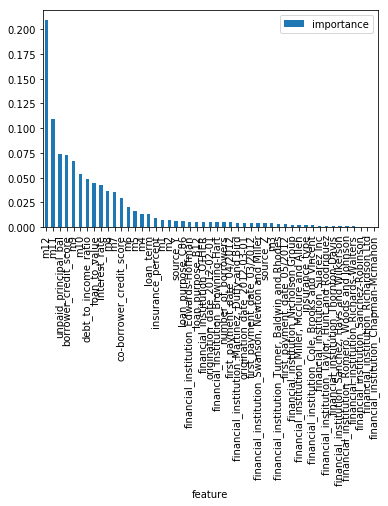

In [259]:
importances.plot.bar()

In [264]:
type(importances)

pandas.core.frame.DataFrame

In [272]:
importances.index[:20]

Index(['m12', 'm11', 'unpaid_principal_bal', 'borrower_credit_score', 'm9',
       'm10', 'debt_to_income_ratio', 'loan_to_value', 'interest_rate', 'm8',
       'm7', 'co-borrower_credit_score', 'm6', 'm5', 'm4', 'loan_term',
       'insurance_percent', 'm1', 'm2', 'source_Y'],
      dtype='object', name='feature')

In [280]:
X_train_new = X_train[importances.index[:15]]
X_test_new = X_test[importances.index[:15]]

In [281]:
# Random Forest with 15 most important features
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train_new, Y_train)
Y_prediction = random_forest.predict(X_test_new)
df = pd.DataFrame({'loan_id':test['loan_id'],
                  'm13':Y_prediction})
df.to_csv('RF_Submission5.csv',index = False)